# <font color="blue"> MBA em Ciência de Dados</font>
# <font color="blue">Técnicas Avançadas para Captura e Tratamento de Dados</font>

## <font color="blue"> Matriz Documento $\times$ Palavras - Bag of Words</font>
    
## <font color="blue">Avaliação Solução</font>

**Material Produzido por Luis Gustavo Nonato**<br>
**Cemeai - ICMC/USP São Carlos**
---

Os exercícios abaixo fazem uso da coleção de documentos presente no diretório `DocCol2` contido no arquivo <font style="font-family: monaco"> DocCol.zip</font>, o qual pode ser baixado do Moodle.

In [3]:
import glob
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
from nltk.stem import PorterStemmer
import pandas as pd
import numpy as np
from collections import Counter

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/jp.ducatti/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


### Exercício 1)
Armazene os documentos disponíveis no diretório `DocCol2` em um dicionário onde a chave é o nome do arquivo e o valor é a string contida no arquivo. O documento contendo o maior número de strings é:

a) gr7<br>
b) au2 <br>
c) ch37<br>
d) au8

**Dica**: Separe as strings de cada documento utilizando o comando <font color='blue'> split(' ') </font> e conte o número de strings resulante.

In [4]:
# Solução aqui
# lista das stop words
stop_words = stopwords.words('english')

files = glob.glob("/Users/jp.ducatti/Documents/mba_data_science_usp/captura_tratamento_dados/modulo_6/DocCol/DocCol2/*")  # vamos utilizar os documento que estão no diretório DocCol3 

docs = {}
for fname in files:
    with open(fname,'r') as f:
        key = fname.split('/')[-1]
        docs[key] = f.read() 

for key, value in docs.items():
    print(key, '-->', len(docs[key].split(' ')))
    # print(key, '-->', len(value))


ch9 --> 1484
ch38 --> 1034
ch31 --> 857
ch7 --> 980
ch36 --> 1474
ch37 --> 3513
ch1 --> 989
ch30 --> 1497
ch6 --> 1273
ch39 --> 1415
ch8 --> 1449
au8 --> 1150
au1 --> 793
au6 --> 831
au7 --> 1119
au9 --> 781
au15 --> 926
au12 --> 1320
gr10 --> 946
gr17 --> 715
gr21 --> 710
gr4 --> 952
gr19 --> 1064
gr3 --> 1245
gr26 --> 1464
au13 --> 990
au14 --> 1579
gr18 --> 833
gr2 --> 897
gr20 --> 2422
gr5 --> 998
gr16 --> 1094
gr11 --> 670
ch23 --> 978
ch24 --> 1364
ch12 --> 1192
ch15 --> 1016
ch41 --> 1582
ch46 --> 1078
ch48 --> 1264
ch14 --> 927
ch13 --> 1759
ch25 --> 1472
ch22 --> 1059
ch49 --> 971
ch47 --> 1026
ch40 --> 1299
ch35 --> 1175
ch3 --> 1281
ch32 --> 1059
ch4 --> 1098
ch50 --> 1400
ch33 --> 1504
ch5 --> 1437
ch34 --> 1306
ch2 --> 1732
au5 --> 1567
au2 --> 1770
au3 --> 816
au4 --> 729
gr14 --> 1431
gr9 --> 888
gr13 --> 1549
gr25 --> 1323
gr22 --> 1517
gr7 --> 1200
au11 --> 777
gr23 --> 1442
gr6 --> 1260
gr1 --> 948
gr24 --> 1276
gr8 --> 947
gr12 --> 2689
gr15 --> 880
au10 --> 839
ch45

### Exercício 2)
Crie um dicionário chamado `docsXwords` onde as chaves são os nomes dos arquivos e os valores são as listas de palavras do documento correspondente. As palavras em cada uma das listas devem ser constituídas apenas por letras do alfabeto, estarem lexicamente normalizadas e conterem mais que 1 caracter. Qual o documento com o maior número de palavras na lista de palavras resultante do processamento:

a) gr22 com 1701 palavras<br>
b) ch30 com 1513 palavras<br>
c) au2 com 1665 palavras<br>
d) au8 com 1525 palavras

In [5]:
# Solução aqui
docsXwords = {}
for fname in files:
    key = fname.split('/')[-1]  # rotulo do documento
    with open(fname,'r') as f:  # obtendo a lista de palavras processadas de cada documento
        doc = f.read()
        # obtendo palavras do documento
        words = nltk.word_tokenize(doc) 
        # removendo simbolos
        words = [w.lower() for w in words if w.isalpha() and len(w) > 1] 
        # stemming
        words = [PorterStemmer().stem(w) for w in words]
        # calculando a frequência de palavras
        docsXwords[key] = dict(Counter(words))
        print(key,'-->',sum(docsXwords[key].values()) )



ch9 --> 1296
ch38 --> 963
ch31 --> 814
ch7 --> 873
ch36 --> 1379
ch37 --> 1078
ch1 --> 961
ch30 --> 1525
ch6 --> 1271
ch39 --> 1288
ch8 --> 1352
au8 --> 963
au1 --> 752
au6 --> 733
au7 --> 1001
au9 --> 636
au15 --> 840
au12 --> 1186
gr10 --> 783
gr17 --> 435
gr21 --> 659
gr4 --> 893
gr19 --> 801
gr3 --> 833
gr26 --> 1078
au13 --> 925
au14 --> 1503
gr18 --> 772
gr2 --> 759
gr20 --> 774
gr5 --> 256
gr16 --> 725
gr11 --> 625
ch23 --> 1016
ch24 --> 1414
ch12 --> 1141
ch15 --> 980
ch41 --> 1106
ch46 --> 979
ch48 --> 1302
ch14 --> 922
ch13 --> 698
ch25 --> 1262
ch22 --> 1033
ch49 --> 967
ch47 --> 1049
ch40 --> 1304
ch35 --> 1146
ch3 --> 1030
ch32 --> 1039
ch4 --> 1059
ch50 --> 1008
ch33 --> 1211
ch5 --> 935
ch34 --> 899
ch2 --> 877
au5 --> 1194
au2 --> 1678
au3 --> 443
au4 --> 625
gr14 --> 715
gr9 --> 804
gr13 --> 614
gr25 --> 1342
gr22 --> 998
gr7 --> 460
au11 --> 747
gr23 --> 1415
gr6 --> 468
gr1 --> 746
gr24 --> 941
gr8 --> 787
gr12 --> 376
gr15 --> 658
au10 --> 669
ch45 --> 992
ch42 --> 

### Exercício 3)
Utilizando as listas de palavras do dicionário `docsXwords`, quais as três palavras que mais aparecem na coleção de documentos:

a) the, is, of<br>
b) that, is, of<br>
c) the, of, to <br>
d) to, is, of

In [6]:
# Solução aqui
corpus = []

for v in docsXwords.values():
    corpus.extend(list(v.keys()))  # juntando as listas de 
                                   # palavras de cada documento
corpus = list(set(corpus)) # removendo palavras repetidas
print(corpus[:10])

['ramp', 'accid', 'roughli', 'videotap', 'catechist', 'prefer', 'advic', 'figur', 'plank', 'conductor']


In [7]:
# construindo um DataFrame onde os rótulos das colunas são
# as palavras e os das linhas os documentos
import pandas as pd
import numpy as np

rows = list(docsXwords.keys())

BoW = pd.DataFrame(data=np.zeros((len(rows),len(corpus))),
                   columns=corpus,index=rows,dtype=int)

for k in docsXwords.keys():
    BoW.loc[k,list(docsXwords[k].keys())] = list(docsXwords[k].values())

BoW.head()  


,ramp,accid,roughli,videotap,catechist,prefer,advic,figur,plank,conductor,...,grown,al,fallibl,technolog,back,massey,possess,henc,die,guardian
ch9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
ch38,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,3,0
ch31,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
ch7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
ch36,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [8]:
df2 = BoW.sum(axis=0).sort_values(ascending=False)
print(df2)


the         5014
of          2627
to          2611
and         2094
is          1767
            ... 
fourier        1
criteria       1
maddox         1
hatr           1
guardian       1
Length: 6880, dtype: int64


### Exercício 4)
Qual o documento cuja lista de palavras possui o **maior** número de "stop words"? Quantas "stop words" aparecem neste documento:

a) ch30 com 829 "stop words" <br>
b) gr17 com 147 "stop words"<br>
c) au2 com 717 "stop words"<br>
d) gr17 com 637 "stop words"

**Dica**: Crie um dicionário a partir de docsXwords onde a chave é o nome do documento e o valor o número de stop words no documento.

In [9]:

# Solução aqui
docsXwords = {}
for fname in files:
    key = fname.split('/')[-1]  # rotulo do documento
    with open(fname,'r') as f:  # obtendo a lista de palavras processadas de cada documento
        doc = f.read()
        # obtendo palavras do documento
        words = nltk.word_tokenize(doc) 
        # removendo simbolos
        words = [w.lower() for w in words if w.isalpha() and len(w) > 1] 
        # stemming
        words = [PorterStemmer().stem(w) for w in words]
        # calculando a frequência de palavras
        docsXwords[key] = dict(Counter(words))
        print(key,'-->',sum(docsXwords[key].values()) )
        # removendo stop words
        words = [w for w in words if w not in stop_words] 
        docsXwords[key] = dict(Counter(words))
        print(key,'-->',sum(docsXwords[key].values()) )

ch9 --> 1296
ch9 --> 708
ch38 --> 963
ch38 --> 489
ch31 --> 814
ch31 --> 445
ch7 --> 873
ch7 --> 471
ch36 --> 1379
ch36 --> 756
ch37 --> 1078
ch37 --> 774
ch1 --> 961
ch1 --> 518
ch30 --> 1525
ch30 --> 690
ch6 --> 1271
ch6 --> 674
ch39 --> 1288
ch39 --> 684
ch8 --> 1352
ch8 --> 676
au8 --> 963
au8 --> 592
au1 --> 752
au1 --> 375
au6 --> 733
au6 --> 397
au7 --> 1001
au7 --> 622
au9 --> 636
au9 --> 360
au15 --> 840
au15 --> 484
au12 --> 1186
au12 --> 673
gr10 --> 783
gr10 --> 520
gr17 --> 435
gr17 --> 367
gr21 --> 659
gr21 --> 399
gr4 --> 893
gr4 --> 506
gr19 --> 801
gr19 --> 440
gr3 --> 833
gr3 --> 495
gr26 --> 1078
gr26 --> 599
au13 --> 925
au13 --> 489
au14 --> 1503
au14 --> 855
gr18 --> 772
gr18 --> 387
gr2 --> 759
gr2 --> 513
gr20 --> 774
gr20 --> 567
gr5 --> 256
gr5 --> 209
gr16 --> 725
gr16 --> 479
gr11 --> 625
gr11 --> 452
ch23 --> 1016
ch23 --> 508
ch24 --> 1414
ch24 --> 706
ch12 --> 1141
ch12 --> 559
ch15 --> 980
ch15 --> 556
ch41 --> 1106
ch41 --> 591
ch46 --> 979
ch46 --> 517

### Exercício 5) 
Utilize o dicionário `docsXwords` para construir
uma matriz Documentos $\times$ Palavras para a coleção de documentos do diretório `DocCol2`. Utilizando a distância cosseno, qual é o documento mais parecido com o documento 'ch21':

a) ch8<br>
b) ch16 <br>
c) ch15 <br>
d) au8

In [10]:
# Solução aqui

# Solução aqui
docsXwords = {}
for fname in files:
    key = fname.split('/')[-1]  # rotulo do documento
    with open(fname,'r') as f:  # obtendo a lista de palavras processadas de cada documento
        doc = f.read()
        # obtendo palavras do documento
        words = nltk.word_tokenize(doc) 
        # removendo simbolos
        words = [w.lower() for w in words if w.isalpha() and len(w) > 1] 
        # stemming
        words = [PorterStemmer().stem(w) for w in words]
        # removendo stop words
        words = [w for w in words if w not in stop_words] 
        docsXwords[key] = dict(Counter(words))
        print(key,'-->',sum(docsXwords[key].values()) )





ch9 --> 708
ch38 --> 489
ch31 --> 445
ch7 --> 471
ch36 --> 756
ch37 --> 774
ch1 --> 518
ch30 --> 690
ch6 --> 674
ch39 --> 684
ch8 --> 676
au8 --> 592
au1 --> 375
au6 --> 397
au7 --> 622
au9 --> 360
au15 --> 484
au12 --> 673
gr10 --> 520
gr17 --> 367
gr21 --> 399
gr4 --> 506
gr19 --> 440
gr3 --> 495
gr26 --> 599
au13 --> 489
au14 --> 855
gr18 --> 387
gr2 --> 513
gr20 --> 567
gr5 --> 209
gr16 --> 479
gr11 --> 452
ch23 --> 508
ch24 --> 706
ch12 --> 559
ch15 --> 556
ch41 --> 591
ch46 --> 517
ch48 --> 730
ch14 --> 459
ch13 --> 391
ch25 --> 653
ch22 --> 542
ch49 --> 514
ch47 --> 533
ch40 --> 689
ch35 --> 620
ch3 --> 539
ch32 --> 560
ch4 --> 541
ch50 --> 522
ch33 --> 644
ch5 --> 547
ch34 --> 500
ch2 --> 400
au5 --> 728
au2 --> 961
au3 --> 306
au4 --> 360
gr14 --> 496
gr9 --> 437
gr13 --> 484
gr25 --> 746
gr22 --> 710
gr7 --> 361
au11 --> 400
gr23 --> 805
gr6 --> 322
gr1 --> 459
gr24 --> 591
gr8 --> 448
gr12 --> 307
gr15 --> 372
au10 --> 397
ch45 --> 560
ch42 --> 513
ch18 --> 722
ch27 --> 503


In [11]:
# Solução aqui
corpus = []

for v in docsXwords.values():
    corpus.extend(list(v.keys()))  # juntando as listas de 
                                   # palavras de cada documento
corpus = list(set(corpus)) # removendo palavras repetidas
print(corpus[:10])

['ramp', 'accid', 'roughli', 'videotap', 'catechist', 'prefer', 'advic', 'figur', 'plank', 'conductor']


In [12]:
# construindo um DataFrame onde os rótulos das colunas são
# as palavras e os das linhas os documentos
import pandas as pd
import numpy as np

rows = list(docsXwords.keys())

BoW = pd.DataFrame(data=np.zeros((len(rows),len(corpus))),
                   columns=corpus,index=rows,dtype=int)

for k in docsXwords.keys():
    BoW.loc[k,list(docsXwords[k].keys())] = list(docsXwords[k].values())

BoW.head()  


,ramp,accid,roughli,videotap,catechist,prefer,advic,figur,plank,conductor,...,grown,al,fallibl,technolog,back,massey,possess,henc,die,guardian
ch9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
ch38,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,3,0
ch31,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
ch7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
ch36,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [14]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# encontrando as classes dos documentos a partir das iniciais dos
# nomes dos documentos
docid = {}
for i,c in enumerate(BoW.index.values):
   if c[0:2] not in docid:
      docid[c[0:2]] = i
        
print(docid)
        
doc_class = [docid[c[0:2]] for c in BoW.index.values]

X = BoW.values
X = StandardScaler().fit_transform(X)

pca_obj = PCA(n_components=2)
Xpca = pca_obj.fit_transform(X)

{'ch': 0, 'au': 11, 'gr': 18}


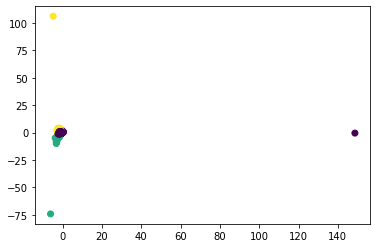

In [15]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.scatter(Xpca[:,0],Xpca[:,1],c=doc_class)

Documento mais parecido com ch21:  ch15


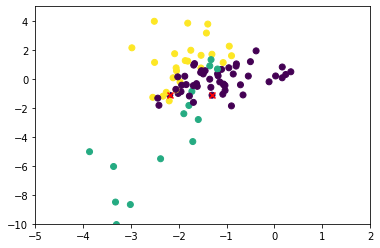

In [16]:
# encontrando o indice da linha de 'ch21' no DataFrame
ch21_id = np.argwhere(BoW.index.values=='ch21')[0][0]

X = BoW.values
X = StandardScaler().fit_transform(X)

# calculando o cosseno utilizando a formula
# cos(x,y) = np.dot(x,y)/(np.linalg.norm(x)*np.linalg.norm(y))
cosch21 = np.apply_along_axis(lambda x: 
             np.dot(X[ch21_id],x)/(np.linalg.norm(ch21_id)*np.linalg.norm(x)),1,X)

# ordenando e pegando o maior valor (note que o elemento [-1] é o 
# próprio documento ch21)
sim_ch21_id = np.argsort(cosch21)[-2]
print('Documento mais parecido com ch21: ',BoW.index.values[sim_ch21_id])

fig, ax = plt.subplots()
ax.set_xlim(-5, 2)
ax.set_ylim(-10, 5)

# ch21 e o documento mais parecido estão marcos com um X vermelho
plt.scatter(Xpca[:,0],Xpca[:,1],c=doc_class)
plt.scatter(Xpca[[ch21_id,sim_ch21_id],0],Xpca[[ch21_id,sim_ch21_id],1],marker='x',color='r')